# Hur gör man ett HR-diagram i python?

För det första så behöver vi data. I den här labben kommer vi använda oss av data från en satellit som heter GAIA. Om du är intresserad kan du läsa mer om GAIA här(https://www.esa.int/Science_Exploration/Space_Science/Gaia). 

För att skaffa oss lite data så börjar vi med att koppla upp oss mot GAIA databasen.

In [2]:
#Först börjar vi med att importera alla bibliotek vi behöver. KÖR ALLTID DENNA innan nått annat!!!

import numpy as np 
from astroquery.gaia import Gaia
import astropy.units as u
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt
from matplotlib import colors
plt.rc('text', usetex=True)




In [3]:
koordinater = SkyCoord.from_name('M2')

koordinater

<SkyCoord (ICRS): (ra, dec) in deg
    (323.362583, -0.82325)>

In [36]:


q_test = """
SELECT  phot_g_mean_mag+5-5*log10(1000/parallax) as abs_mag, bp_rp
FROM gaiadr3.gaia_source_lite
WHERE DISTANCE(323.4, -0.82, ra, dec) < 10
AND parallax > 0
AND bp_rp IS NOT NULL
AND phot_g_mean_flux_over_error > 50
AND phot_bp_mean_flux_over_error > 20
AND phot_rp_mean_flux_over_error > 20
AND 1000/parallax > 200
AND parallax_over_error > 10
"""

job = Gaia.launch_job_async(q_test)

results = job.get_results()

results

INFO: Query finished. [astroquery.utils.tap.core]


abs_mag,bp_rp
,mag
float64,float32
11.113064333628381,2.8172817
6.184602130655341,1.1759014
4.136629142072916,0.84285927
8.236208335192728,1.9636898
4.210872430969744,0.8064375
4.480317294468346,0.8308258
7.093319490893979,1.3679495
0.6956708995773404,1.3487482


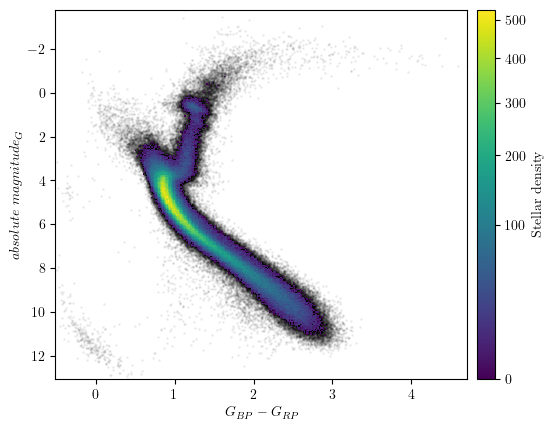

In [40]:
bp_rp = results['bp_rp'].data
abs_mag = results['abs_mag'].data

fig, ax = plt.subplots()

h = ax.hist2d(bp_rp, abs_mag, bins=300, cmin=10, norm=colors.PowerNorm(0.5), zorder=0.5)

ax.scatter(bp_rp, abs_mag, alpha=0.05, s=1, color='k', zorder=0)
ax.invert_yaxis()


cb = fig.colorbar(h[3], ax=ax, pad=0.02)

ax.set_xlabel(r'$G_{BP} - G_{RP}$')
ax.set_ylabel(r'$absolute \ magnitude_G$')
cb.set_label(r"$\mathrm{Stellar~density}$")